In [42]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import precision_score, recall_score, roc_curve, f1_score, classification_report, auc
from sklearn.cluster import KMeans
from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler
from imblearn.under_sampling import ClusterCentroids
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

In [43]:
nm_df = pd.read_csv("../NetworkMeasuresFeatures.csv")

In [44]:
nm_df_orig = nm_df.copy()

In [45]:
# Renaming columns in readable format to understand what each column represents.
nm_df = nm_df_orig.copy()
col_names = ['Actor', 'A_Acc',
             'PartyPlay_InDegree', 'PartyPlay_OutDegree', 'PartyPlay_Degree',
             'PartyPlay_WeightedDegree', 'PartyPlay_WeightedInDegree', 'PartyPlay_WeightedOutDegree',
             'PartyPlay_Eccentricity', 'PartyPlay_ClosenessCentrality', 'PartyPlay_BetweennessCentrality',
             'PartyPlay_Authority', 'PartyPlay_Hub', 'PartyPlay_ModularityClass', 'PartyPlay_Pagerank',
             'PartyPlay_ComponentId', 'PartyPlay_StrConnId', 'PartyPlay_ClusteringCoefficient', 'PartyPlay_Eigenvector',
             'Friendship_InDegree', 'Friendship_OutDegree', 'Friendship_Degree',
             'Friendship_WeightedDegree', 'Friendship_WeightedInDegree', 'Friendship_WeightedOutDegree',
             'Friendship_Eccentricity', 'Friendship_ClosenessCentrality', 'Friendship_BetweennessCentrality',
             'Friendship_Authority', 'Friendship_Hub', 'Friendship_ModularityClass', 'Friendship_Pagerank',
             'Friendship_ComponentId', 'Friendship_StrConnId', 'Friendship_ClusteringCoefficient', 'Friendship_Eigenvector',
             'Trade_InDegree', 'Trade_OutDegree', 'Trade_Degree',
             'Trade_WeightedDegree', 'Trade_WeightedInDegree', 'Trade_WeightedOutDegree',
             'Trade_Eccentricity', 'Trade_ClosenessCentrality', 'Trade_BetweennessCentrality',
             'Trade_Authority', 'Trade_Hub', 'Trade_ModularityClass', 'Trade_Pagerank',
             'Trade_ComponentId', 'Trade_StrConnId', 'Trade_ClusteringCoefficient', 'Trade_Eigenvector',
             'Whisper_InDegree', 'Whisper_OutDegree', 'Whisper_Degree',
             'Whisper_WeightedDegree', 'Whisper_WeightedInDegree', 'Whisper_WeightedOutDegree',
             'Whisper_Eccentricity', 'Whisper_ClosenessCentrality', 'Whisper_BetweennessCentrality',
             'Whisper_Authority', 'Whisper_Hub', 'Whisper_ModularityClass', 'Whisper_Pagerank',
             'Whisper_ComponentId', 'Whisper_StrConnId', 'Whisper_ClusteringCoefficient', 'Whisper_Eigenvector',
             'Mail_InDegree', 'Mail_OutDegree', 'Mail_Degree',
             'Mail_WeightedDegree', 'Mail_WeightedInDegree', 'Mail_WeightedOutDegree',
             'Mail_Eccentricity', 'Mail_ClosenessCentrality', 'Mail_BetweennessCentrality',
             'Mail_Authority', 'Mail_Hub', 'Mail_ModularityClass', 'Mail_Pagerank',
             'Mail_ComponentId', 'Mail_StrConnId', 'Mail_ClusteringCoefficient', 'Mail_Eigenvector',
             'Shop_InDegree', 'Shop_OutDegree', 'Shop_Degree',
             'Shop_WeightedDegree', 'Shop_WeightedInDegree', 'Shop_WeightedOutDegree',
             'Shop_Eccentricity', 'Shop_ClosenessCentrality', 'Shop_BetweennessCentrality',
             'Shop_Authority', 'Shop_Hub', 'Shop_ModularityClass', 'Shop_Pagerank',
             'Shop_ComponentId', 'Shop_StrConnId', 'Shop_ClusteringCoefficient', 'Shop_Eigenvector',
             'Type'
            ]
nm_df.columns = col_names
nm_df_orig.columns = col_names

In [46]:
# Change Type as Category
nm_df.Type = nm_df.Type.astype('category')

In [47]:
# Creating a numerical field for Type
nm_df.Type.replace({'Human': 0, 'Bot': 1}, inplace=True)

In [48]:
type_dict = {0 : 'Human', 1: 'Bot'}

In [49]:
# Creating different datasets based on the Group activity
party_df = nm_df[[
                  'PartyPlay_InDegree', 'PartyPlay_OutDegree', 'PartyPlay_Degree',
                  'PartyPlay_WeightedDegree', 'PartyPlay_WeightedInDegree', 'PartyPlay_WeightedOutDegree',
                  'PartyPlay_Eccentricity', 'PartyPlay_ClosenessCentrality', 'PartyPlay_BetweennessCentrality',
                  'PartyPlay_Authority', 'PartyPlay_Hub', 'PartyPlay_ModularityClass', 'PartyPlay_Pagerank',
                  'PartyPlay_ComponentId', 'PartyPlay_StrConnId', 'PartyPlay_ClusteringCoefficient',
                  'PartyPlay_Eigenvector', 'Type']].copy()
friendship_df = nm_df[['Friendship_InDegree', 'Friendship_OutDegree', 'Friendship_Degree',
                       'Friendship_WeightedDegree', 'Friendship_WeightedInDegree', 'Friendship_WeightedOutDegree',
                       'Friendship_Eccentricity', 'Friendship_ClosenessCentrality', 'Friendship_BetweennessCentrality',
                       'Friendship_Authority', 'Friendship_Hub', 'Friendship_ModularityClass', 'Friendship_Pagerank',
                       'Friendship_ComponentId', 'Friendship_StrConnId', 'Friendship_ClusteringCoefficient', 'Friendship_Eigenvector',
                       'Type']].copy()
trade_df = nm_df[[
    'Trade_InDegree', 'Trade_OutDegree', 'Trade_Degree',
    'Trade_WeightedDegree', 'Trade_WeightedInDegree', 'Trade_WeightedOutDegree',
    'Trade_Eccentricity', 'Trade_ClosenessCentrality', 'Trade_BetweennessCentrality',
    'Trade_Authority', 'Trade_Hub', 'Trade_ModularityClass', 'Trade_Pagerank',
    'Trade_ComponentId', 'Trade_StrConnId', 'Trade_ClusteringCoefficient', 'Trade_Eigenvector',
    'Type']].copy()
shop_df = nm_df[[
             'Shop_InDegree', 'Shop_OutDegree', 'Shop_Degree',
             'Shop_WeightedDegree', 'Shop_WeightedInDegree', 'Shop_WeightedOutDegree',
             'Shop_Eccentricity', 'Shop_ClosenessCentrality', 'Shop_BetweennessCentrality',
             'Shop_Authority', 'Shop_Hub', 'Shop_ModularityClass', 'Shop_Pagerank',
             'Shop_ComponentId', 'Shop_StrConnId', 'Shop_ClusteringCoefficient', 'Shop_Eigenvector',
             'Type']].copy()
whisper_df = nm_df[[
    'Whisper_InDegree', 'Whisper_OutDegree', 'Whisper_Degree',
    'Whisper_WeightedDegree', 'Whisper_WeightedInDegree', 'Whisper_WeightedOutDegree',
    'Whisper_Eccentricity', 'Whisper_ClosenessCentrality', 'Whisper_BetweennessCentrality',
    'Whisper_Authority', 'Whisper_Hub', 'Whisper_ModularityClass', 'Whisper_Pagerank',
    'Whisper_ComponentId', 'Whisper_StrConnId', 'Whisper_ClusteringCoefficient', 'Whisper_Eigenvector',
    'Type' ]].copy()
mail_df = nm_df[[
    'Mail_InDegree', 'Mail_OutDegree', 'Mail_Degree',
    'Mail_WeightedDegree', 'Mail_WeightedInDegree', 'Mail_WeightedOutDegree',
    'Mail_Eccentricity', 'Mail_ClosenessCentrality', 'Mail_BetweennessCentrality',
    'Mail_Authority', 'Mail_Hub', 'Mail_ModularityClass', 'Mail_Pagerank',
    'Mail_ComponentId', 'Mail_StrConnId', 'Mail_ClusteringCoefficient', 'Mail_Eigenvector',
    'Type']].copy()


In [50]:
# Getting the list of cols that we want to visulaize in pairplot. This will exclude the Actor and A_Acc cols
cols = party_df.columns.tolist()
#cols.remove('Actor'); cols.remove('A_Acc')
print(cols)

['PartyPlay_InDegree', 'PartyPlay_OutDegree', 'PartyPlay_Degree', 'PartyPlay_WeightedDegree', 'PartyPlay_WeightedInDegree', 'PartyPlay_WeightedOutDegree', 'PartyPlay_Eccentricity', 'PartyPlay_ClosenessCentrality', 'PartyPlay_BetweennessCentrality', 'PartyPlay_Authority', 'PartyPlay_Hub', 'PartyPlay_ModularityClass', 'PartyPlay_Pagerank', 'PartyPlay_ComponentId', 'PartyPlay_StrConnId', 'PartyPlay_ClusteringCoefficient', 'PartyPlay_Eigenvector', 'Type']


In [51]:
models = []
models.append(("LR", LogisticRegression()))
#models.append(("LDA", LinearDiscriminantAnalysis()))
#models.append(("KNN", KNeighborsClassifier()))
#models.append(("Tree", DecisionTreeClassifier()))
#models.append(("NB", GaussianNB()))
#models.append(("SVC", SVC()))

In [52]:
cols_to_take = [
    'Actor', 'A_Acc',         
    'PartyPlay_InDegree', 'PartyPlay_OutDegree', 'PartyPlay_WeightedInDegree', 'PartyPlay_WeightedOutDegree',
    'PartyPlay_ClusteringCoefficient',
    'Friendship_InDegree', 'Friendship_OutDegree', 'Friendship_WeightedInDegree', 'Friendship_WeightedOutDegree',
    'Friendship_ClusteringCoefficient',
    'Trade_InDegree', 'Trade_OutDegree', 'Trade_WeightedInDegree', 'Trade_WeightedOutDegree',
    'Trade_ClusteringCoefficient',
    'Mail_InDegree', 'Mail_OutDegree', 'Mail_WeightedInDegree', 'Mail_WeightedOutDegree',
    'Mail_ClusteringCoefficient',
    'Shop_InDegree', 'Shop_OutDegree', 'Shop_WeightedInDegree', 'Shop_WeightedOutDegree',
    'Shop_ClusteringCoefficient', 
    'Whisper_InDegree', 'Whisper_OutDegree', 'Whisper_WeightedInDegree', 'Whisper_WeightedOutDegree',
    'Whisper_ClusteringCoefficient',
    'PartyPlay_Degree', 'PartyPlay_WeightedDegree', 
    'Friendship_Degree', 'Friendship_WeightedDegree', 
    'Trade_Degree', 'Trade_WeightedDegree', 
    'Shop_Degree', 'Shop_WeightedDegree', 
    'Mail_Degree', 'Mail_WeightedDegree', 
    'Type']

In [53]:
# Standardizing the below columns to make the values comparable

In [54]:
cols_to_zscore = {
    'party_play': ['PartyPlay_BetweennessCentrality', 'PartyPlay_ClosenessCentrality', 
    'PartyPlay_Eigenvector', 'PartyPlay_Eccentricity', 'PartyPlay_Authority', 'PartyPlay_Hub', 'PartyPlay_Pagerank'],
    'friendship': ['Friendship_BetweennessCentrality', 'Friendship_ClosenessCentrality', 
    'Friendship_Eigenvector', 'Friendship_Eccentricity', 'Friendship_Authority', 'Friendship_Hub', 'Friendship_Pagerank'],
    'trade': ['Trade_BetweennessCentrality',  'Trade_ClosenessCentrality',
    'Trade_Eigenvector', 'Trade_Eccentricity', 'Trade_Authority', 'Trade_Hub', 'Trade_Pagerank'],
    'shop': ['Shop_BetweennessCentrality', 'Shop_ClosenessCentrality',
    'Shop_Eigenvector', 'Shop_Eccentricity', 'Shop_Authority', 'Shop_Hub', 'Shop_Pagerank'],
    'mail': ['Mail_BetweennessCentrality', 'Mail_ClosenessCentrality', 
    'Mail_Eigenvector', 'Mail_Eccentricity', 'Mail_Authority', 'Mail_Hub', 'Mail_Pagerank'],
    'whisper': ['Whisper_BetweennessCentrality', 'Whisper_ClosenessCentrality', 
    'Whisper_Eigenvector', 'Whisper_Eccentricity', 'Whisper_Authority', 'Whisper_Hub', 'Whisper_Pagerank']
}

In [55]:
grp_act_df = {
    'party_play': party_df,
    'friendship': friendship_df,
    'trade': trade_df,
    'shop': shop_df,
    'mail': mail_df,
    'whisper': whisper_df
}

In [56]:
# For each act_df, apply zscore to the cols listed in cols_to_zscore
for act_name, act_df in grp_act_df.items():
    act_cols_to_zscore = cols_to_zscore.get(act_name)
    act_df[act_cols_to_zscore] = act_df[act_cols_to_zscore].apply(zscore)

# Pairplot analysis

In [57]:
# Checkpoint 
nm_df_zscored = nm_df.copy()

In [58]:
# We will log transform the data for all the columns that have high peak and long thick tail

In [59]:
X_cols_to_log_transform = [
    'PartyPlay_InDegree', 'PartyPlay_OutDegree', 'PartyPlay_WeightedInDegree', 'PartyPlay_WeightedOutDegree',
    'Friendship_InDegree', 'Friendship_OutDegree', 'Friendship_WeightedInDegree', 'Friendship_WeightedOutDegree',
    'Trade_InDegree', 'Trade_OutDegree', 'Trade_WeightedInDegree', 'Trade_WeightedOutDegree',
    'Mail_InDegree', 'Mail_OutDegree', 'Mail_WeightedInDegree', 'Mail_WeightedOutDegree',
    'Shop_InDegree', 'Shop_OutDegree', 'Shop_WeightedInDegree', 'Shop_WeightedOutDegree',
    'Whisper_InDegree', 'Whisper_OutDegree', 'Whisper_WeightedInDegree', 'Whisper_WeightedOutDegree',
    'PartyPlay_Degree', 'PartyPlay_WeightedDegree', 'PartyPlay_BetweennessCentrality', 
    'Friendship_Degree', 'Friendship_WeightedDegree', 'Friendship_BetweennessCentrality',
    'Trade_Degree', 'Trade_WeightedDegree', 'Trade_BetweennessCentrality',
    'Shop_Degree', 'Shop_WeightedDegree', 'Shop_BetweennessCentrality',
    'Mail_Degree', 'Mail_WeightedDegree', 'Mail_BetweennessCentrality',
    'Whisper_Degree', 'Whisper_WeightedDegree', 'Whisper_BetweennessCentrality']

In [60]:
nm_df = nm_df_zscored.copy()

In [61]:
from scipy import stats as scipy_stats
from scipy.special import boxcox1p
from sklearn.preprocessing import PowerTransformer

nm_df_z_t_1 = nm_df_zscored.copy()
'''
transformer = PowerTransformer(method='yeo-johnson')
X = nm_df_z_t_1[X_cols_to_log_transform]
nm_df_z_t_1[X_cols_to_log_transform] = transformer.fit_transform(X)
'''
for col in X_cols_to_log_transform:
    #print("Transforming %s" % col)
    # The boxcox transformation with value of 0 does log transformation
    nm_df_z_t_1[col] = pd.Series(boxcox1p(nm_df_z_t_1[col].values, 0))
    nm_df_z_t_1[col] = pd.Series(boxcox1p(nm_df_z_t_1[col].values, 0))
    
    

In [62]:
nm_df_orig.PartyPlay_InDegree.value_counts().sort_index().tail(5)

753    1
757    1
790    1
806    1
876    1
Name: PartyPlay_InDegree, dtype: int64

In [63]:
# Lets see how the scaled value of above now looks like
nm_df_z_t_1.PartyPlay_InDegree.value_counts().sort_values().head(5)
# We have scaled down from 876 to value of 2

1.935416    1
1.925406    1
1.999933    1
1.918560    1
1.966898    1
Name: PartyPlay_InDegree, dtype: int64

In [64]:
# Checkpoint 2
nm_df = nm_df_z_t_1.copy()

In [65]:
nm_df.isna().any()

Actor                               False
A_Acc                               False
PartyPlay_InDegree                  False
PartyPlay_OutDegree                 False
PartyPlay_Degree                    False
PartyPlay_WeightedDegree            False
PartyPlay_WeightedInDegree          False
PartyPlay_WeightedOutDegree         False
PartyPlay_Eccentricity              False
PartyPlay_ClosenessCentrality       False
PartyPlay_BetweennessCentrality     False
PartyPlay_Authority                 False
PartyPlay_Hub                       False
PartyPlay_ModularityClass           False
PartyPlay_Pagerank                  False
PartyPlay_ComponentId               False
PartyPlay_StrConnId                 False
PartyPlay_ClusteringCoefficient     False
PartyPlay_Eigenvector               False
Friendship_InDegree                 False
Friendship_OutDegree                False
Friendship_Degree                   False
Friendship_WeightedDegree           False
Friendship_WeightedInDegree       

In [66]:
# Creating different datasets based on the Group activity
party_df_1 = nm_df[[
                  'PartyPlay_InDegree', 'PartyPlay_OutDegree', 'PartyPlay_Degree',
                  'PartyPlay_WeightedDegree', 'PartyPlay_WeightedInDegree', 'PartyPlay_WeightedOutDegree',
                  'PartyPlay_Eccentricity', 'PartyPlay_ClosenessCentrality', 'PartyPlay_BetweennessCentrality',
                  'PartyPlay_Authority', 'PartyPlay_Hub', 'PartyPlay_ModularityClass', 'PartyPlay_Pagerank',
                  'PartyPlay_ComponentId', 'PartyPlay_StrConnId', 'PartyPlay_ClusteringCoefficient',
                  'PartyPlay_Eigenvector', 'Type']].copy()
friendship_df_1 = nm_df[['Friendship_InDegree', 'Friendship_OutDegree', 'Friendship_Degree',
                       'Friendship_WeightedDegree', 'Friendship_WeightedInDegree', 'Friendship_WeightedOutDegree',
                       'Friendship_Eccentricity', 'Friendship_ClosenessCentrality', 'Friendship_BetweennessCentrality',
                       'Friendship_Authority', 'Friendship_Hub', 'Friendship_ModularityClass', 'Friendship_Pagerank',
                       'Friendship_ComponentId', 'Friendship_StrConnId', 'Friendship_ClusteringCoefficient', 'Friendship_Eigenvector',
                       'Type']].copy()
trade_df_1 = nm_df[[
    'Trade_InDegree', 'Trade_OutDegree', 'Trade_Degree',
    'Trade_WeightedDegree', 'Trade_WeightedInDegree', 'Trade_WeightedOutDegree',
    'Trade_Eccentricity', 'Trade_ClosenessCentrality', 'Trade_BetweennessCentrality',
    'Trade_Authority', 'Trade_Hub', 'Trade_ModularityClass', 'Trade_Pagerank',
    'Trade_ComponentId', 'Trade_StrConnId', 'Trade_ClusteringCoefficient', 'Trade_Eigenvector',
    'Type']].copy()
shop_df_1 = nm_df[[
             'Shop_InDegree', 'Shop_OutDegree', 'Shop_Degree',
             'Shop_WeightedDegree', 'Shop_WeightedInDegree', 'Shop_WeightedOutDegree',
             'Shop_Eccentricity', 'Shop_ClosenessCentrality', 'Shop_BetweennessCentrality',
             'Shop_Authority', 'Shop_Hub', 'Shop_ModularityClass', 'Shop_Pagerank',
             'Shop_ComponentId', 'Shop_StrConnId', 'Shop_ClusteringCoefficient', 'Shop_Eigenvector',
             'Type']].copy()
whisper_df_1 = nm_df[[
    'Whisper_InDegree', 'Whisper_OutDegree', 'Whisper_Degree',
    'Whisper_WeightedDegree', 'Whisper_WeightedInDegree', 'Whisper_WeightedOutDegree',
    'Whisper_Eccentricity', 'Whisper_ClosenessCentrality', 'Whisper_BetweennessCentrality',
    'Whisper_Authority', 'Whisper_Hub', 'Whisper_ModularityClass', 'Whisper_Pagerank',
    'Whisper_ComponentId', 'Whisper_StrConnId', 'Whisper_ClusteringCoefficient', 'Whisper_Eigenvector',
    'Type' ]].copy()
mail_df_1 = nm_df[[
    'Mail_InDegree', 'Mail_OutDegree', 'Mail_Degree',
    'Mail_WeightedDegree', 'Mail_WeightedInDegree', 'Mail_WeightedOutDegree',
    'Mail_Eccentricity', 'Mail_ClosenessCentrality', 'Mail_BetweennessCentrality',
    'Mail_Authority', 'Mail_Hub', 'Mail_ModularityClass', 'Mail_Pagerank',
    'Mail_ComponentId', 'Mail_StrConnId', 'Mail_ClusteringCoefficient', 'Mail_Eigenvector',
    'Type']].copy()


In [67]:
X = nm_df_z_t_1[col_names]
X.drop('Type', axis =1)
y = nm_df_z_t_1[y_col]

In [68]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=7)

In [69]:
for model_name, model in models:
    print("Running model %s" % model_name)
    model.fit(X_train, y_train)
    y_predict = model.predict(X_test)
    score = model.score(X_test, y_test)
    print("Confusion Matrix: ")
    print(metrics.confusion_matrix(y_test, y_predict))
    print("Overall precision of %s: %s" % (model_name, precision_score(y_test, y_predict)))
    print("Overall recall of %s: %s" % (model_name, recall_score(y_test, y_predict)))
    print("Overall F1 Score of %s: %s" % (model_name, f1_score(y_test, y_predict)))
    print("Classification Report: ")
    print(classification_report(y_test, y_predict, [0, 1]))

Running model LR


/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Confusion Matrix: 
[[12560   112]
 [ 2161    89]]
Overall precision of LR: 0.4427860696517413
Overall recall of LR: 0.03955555555555555
Overall F1 Score of LR: 0.07262341901264789
Classification Report: 
              precision    recall  f1-score   support

           0       0.85      0.99      0.92     12672
           1       0.44      0.04      0.07      2250

   micro avg       0.85      0.85      0.85     14922
   macro avg       0.65      0.52      0.49     14922
weighted avg       0.79      0.85      0.79     14922



In [70]:
# We will cluster each of the cols in cols_to_zscore and assign a cluster number to each, replacing its original value
# by its cluster number. This is to make the model better as it will then the model will not have to get build
# on scatter values, but on values which represents its cluster, which are very less in number. We do this for
# every such feature in cols_to_zscore on not just on the all the features taken as whole.
k_means_cluster_num = 3

In [71]:
# For each feature, get predicted cluster. Put the resultant cluster value of the feature against new nm_df dataframe
nm_df_z_t_c = nm_df_z_t_1.copy()
for act_name, act_df in grp_act_df.items():
    act_cols = cols_to_zscore.get(act_name)
    for act_col in act_cols:
        tmp_df = pd.DataFrame({act_col: act_df[act_col].copy()})
        clusters = KMeans(n_clusters=k_means_cluster_num, random_state=7, n_init=10)
        clusters.fit(tmp_df)
        predicted_clusters_array = clusters.predict(tmp_df)
        nm_df_z_t_c[act_col] = predicted_clusters_array

In [73]:
X = nm_df_z_t_c[col_names]
X.drop('Type', axis =1)
y = nm_df_z_t_c[y_col]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=7)

In [74]:
models = []
models.append(("LR", LogisticRegression()))


In [75]:
for model_name, model in models:
    print("Running model %s" % model_name)
    model.fit(X_train, y_train)
    y_predict = model.predict(X_test)
    score = model.score(X_test, y_test)
    print("Model Score %s " % score)
    print("Confusion Matrix: ")
    print(metrics.confusion_matrix(y_test, y_predict))
    print("Overall precision of %s: %s" % (model_name, precision_score(y_test, y_predict)))
    print("Overall recall of %s: %s" % (model_name, recall_score(y_test, y_predict)))
    print("Overall F1 Score of %s: %s" % (model_name, f1_score(y_test, y_predict)))
    print("Classification Report: ")
    print(classification_report(y_test, y_predict, [0, 1]))
    print("----------------------------------------------------- \n\n")

Running model LR


/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Model Score 0.8467363624179064 
Confusion Matrix: 
[[12599    73]
 [ 2214    36]]
Overall precision of LR: 0.3302752293577982
Overall recall of LR: 0.016
Overall F1 Score of LR: 0.030521407376006785
Classification Report: 
              precision    recall  f1-score   support

           0       0.85      0.99      0.92     12672
           1       0.33      0.02      0.03      2250

   micro avg       0.85      0.85      0.85     14922
   macro avg       0.59      0.51      0.47     14922
weighted avg       0.77      0.85      0.78     14922

----------------------------------------------------- 




/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:617: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


105.00211106196478
105


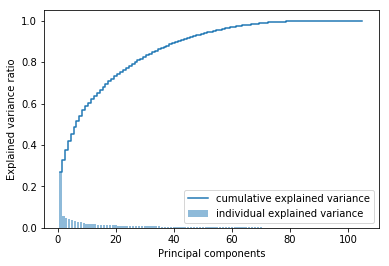

In [76]:
#X = nm_df_z_t_c[X_cols]
#y = nm_df_z_t_c[y_col]
X = nm_df_z_t_c[col_names]
X.drop('Type', axis =1)
y = nm_df_z_t_c[y_col]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=7)

sc = StandardScaler()
X_std = sc.fit_transform(X)
cov_matrix = np.cov(X_std.T)
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

# Make a set of (eigenvalue, eigenvector) pairs
eig_pairs = [(eigenvalues[index], eigenvectors[:,index]) for index in range(len(eigenvalues))]

# Sort the (eigenvalue, eigenvector) pairs from highest to lowest with respect to eigenvalue
eig_pairs.sort()

eig_pairs.reverse()
#print(eig_pairs)

# Extract the descending ordered eigenvalues and eigenvectors
eigvalues_sorted = [eig_pairs[index][0] for index in range(len(eigenvalues))]
eigvectors_sorted = [eig_pairs[index][1] for index in range(len(eigenvalues))]

tot = sum(eigenvalues)
print(tot)
var_explained = [(i / tot) for i in sorted(eigenvalues, reverse=True)]  # an array of variance explained by each 
# eigen vector... there will be 8 entries as there are 8 eigen vectors)
cum_var_exp = np.cumsum(var_explained)  # an array of cumulative variance. There will be 8 entries with 8 th entry 
# cumulative reaching almost 100%
print(len(eigenvalues))
plt.bar(range(1,106), var_explained, alpha=0.5, align='center', label='individual explained variance')
plt.step(range(1,106),cum_var_exp, where= 'mid', label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc = 'best')
plt.show()

In [77]:
# P_reduce represents reduced mathematical space....

P_reduce = np.array(eigvectors_sorted[0:80])   # Reducing from 8 to 4 dimension space

X_std_4D = np.dot(X_std,P_reduce.T)   # projecting original data into principal component dimensions

Proj_data_df = pd.DataFrame(X_std_4D)  # converting array to dataframe for pairplot

In [82]:
X_train_pca, X_test_pca, y_train_pca, y_test_pca = model_selection.train_test_split(Proj_data_df, y, test_size=0.3, random_state=7)

In [83]:
results = []
model_names = []
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
auc_metrics = []
for model_name, model in models:
    print("Running model %s" % model_name)
    model.fit(X_train_pca, y_train_pca)
    y_predict_pca = model.predict(X_test_pca)
    score = model.score(X_test_pca, y_test_pca)
    print("Model score %s" % score)
    print("Confusion Matrix: ")
    print(metrics.confusion_matrix(y_test_pca, y_predict_pca))
    print("Overall precision of %s: %s" % (model_name, precision_score(y_test_pca, y_predict_pca)))
    print("Overall recall of %s: %s" % (model_name, recall_score(y_test_pca, y_predict_pca)))
    print("Overall F1 Score of %s: %s" % (model_name, f1_score(y_test_pca, y_predict_pca)))
    print("Classification Report: ")
    print(classification_report(y_test_pca, y_predict_pca, [0, 1]))
    fpr, tpr, threshold = roc_curve(y_test_pca, y_predict_pca)
    roc_auc = auc(fpr, tpr)
    auc_metrics.append((model_name, fpr, tpr, roc_auc))

Running model LR


/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Model score 1.0
Confusion Matrix: 
[[12672     0]
 [    0  2250]]
Overall precision of LR: 1.0
Overall recall of LR: 1.0
Overall F1 Score of LR: 1.0
Classification Report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     12672
           1       1.00      1.00      1.00      2250

   micro avg       1.00      1.00      1.00     14922
   macro avg       1.00      1.00      1.00     14922
weighted avg       1.00      1.00      1.00     14922

Running model LDA


/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Model score 1.0
Confusion Matrix: 
[[12672     0]
 [    0  2250]]
Overall precision of LDA: 1.0
Overall recall of LDA: 1.0
Overall F1 Score of LDA: 1.0
Classification Report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     12672
           1       1.00      1.00      1.00      2250

   micro avg       1.00      1.00      1.00     14922
   macro avg       1.00      1.00      1.00     14922
weighted avg       1.00      1.00      1.00     14922

Running model KNN


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  del sys.path[0]


Model score 0.9624045034177724
Confusion Matrix: 
[[12621    51]
 [  510  1740]]
Overall precision of KNN: 0.9715242881072027
Overall recall of KNN: 0.7733333333333333
Overall F1 Score of KNN: 0.8611729769858946
Classification Report: 
              precision    recall  f1-score   support

           0       0.96      1.00      0.98     12672
           1       0.97      0.77      0.86      2250

   micro avg       0.96      0.96      0.96     14922
   macro avg       0.97      0.88      0.92     14922
weighted avg       0.96      0.96      0.96     14922

Running model CART
Model score 0.9778850020104544
Confusion Matrix: 
[[12494   178]
 [  152  2098]]
Overall precision of CART: 0.9217926186291739
Overall recall of CART: 0.9324444444444444
Overall F1 Score of CART: 0.9270879363676535
Classification Report: 
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     12672
           1       0.92      0.93      0.93      2250

   micro avg   

/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Model score 0.9983246213644283
Confusion Matrix: 
[[12672     0]
 [   25  2225]]
Overall precision of SVM: 1.0
Overall recall of SVM: 0.9888888888888889
Overall F1 Score of SVM: 0.9944134078212291
Classification Report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     12672
           1       1.00      0.99      0.99      2250

   micro avg       1.00      1.00      1.00     14922
   macro avg       1.00      0.99      1.00     14922
weighted avg       1.00      1.00      1.00     14922



In [86]:
# We are getting 100% accuracy for Logistic Regresssion and LDA. Even SVM is performing with 99% accuracy

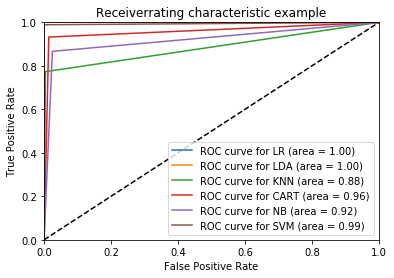

In [87]:
# Plot ROC curve
plt.clf()
for model_name, fpr, tpr, roc_auc in auc_metrics:
    plt.plot(fpr, tpr, label='ROC curve for %s (area = %0.2f)' % (model_name, roc_auc))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiverrating characteristic example')
plt.legend(loc="lower right")
plt.show()